<h1 align='center'> Perceptron Trick</h1>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification

In [3]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=30)

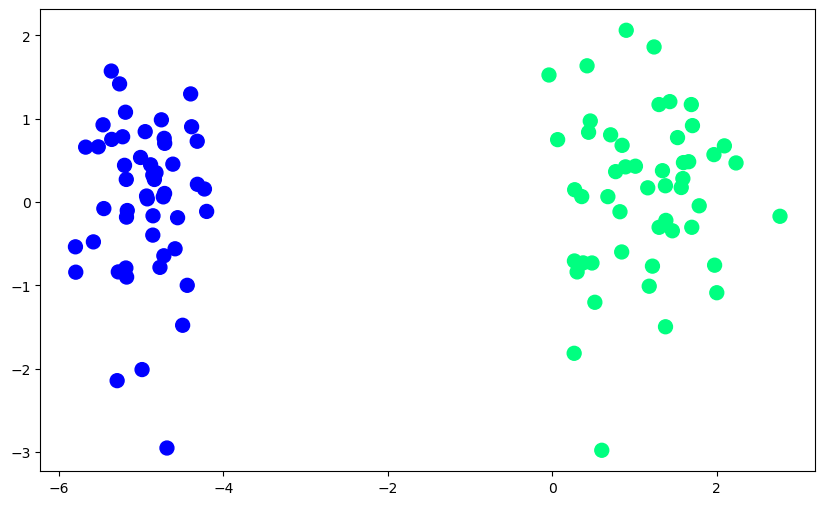

In [5]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap='winter', s= 100)

### Perceptron Trick

In [6]:
def perceptron(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
    return weights[0],weights[1:]

In [7]:
def step(z):
    return 1 if z>0 else 0

In [8]:
intercept_,coef_ = perceptron(X,y)

In [9]:
print("Coeffient = ",coef_)
print("Intercept = ",intercept_)

Coeffient =  [1.1204053  0.40381514]
Intercept =  1.2000000000000002


In [10]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [11]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

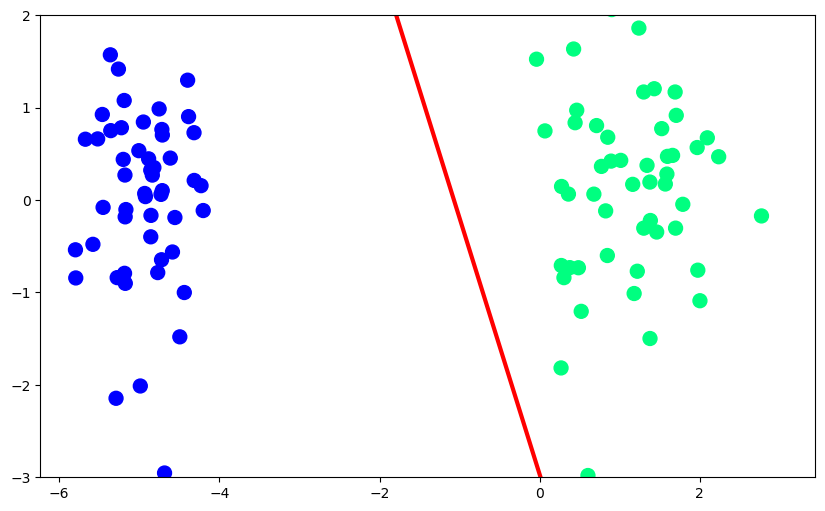

In [12]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

### Logistic Regression 

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
logistic = LogisticRegression()
logistic.fit(X,y)

LogisticRegression()

In [15]:
m = -(logistic.coef_[0][0]/logistic.coef_[0][1])
b = -(logistic.intercept_/logistic.coef_[0][1])

In [16]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input + b

### Logistic Regression Vs Perceptron

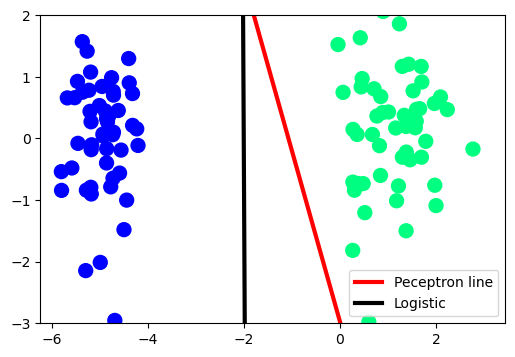

In [17]:
plt.figure(figsize=(6,4))
plt.plot(x_input,y_input,color='red',linewidth=3, label='Peceptron line')
plt.plot(x_input1,y_input1,color='black',linewidth=3, label='Logistic')
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)
plt.legend()
plt.show()

### <font color='Red'> Perceptron Trick with Sigmoid</font>

In [18]:
def perceptron_sigmoid(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = sigmoid(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
    return weights[0],weights[1:]

In [19]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [20]:
intercept_,coef_ = perceptron_sigmoid(X,y)

In [21]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [22]:
x_input2 = np.linspace(-3,3,100)
y_input2 = m*x_input + b

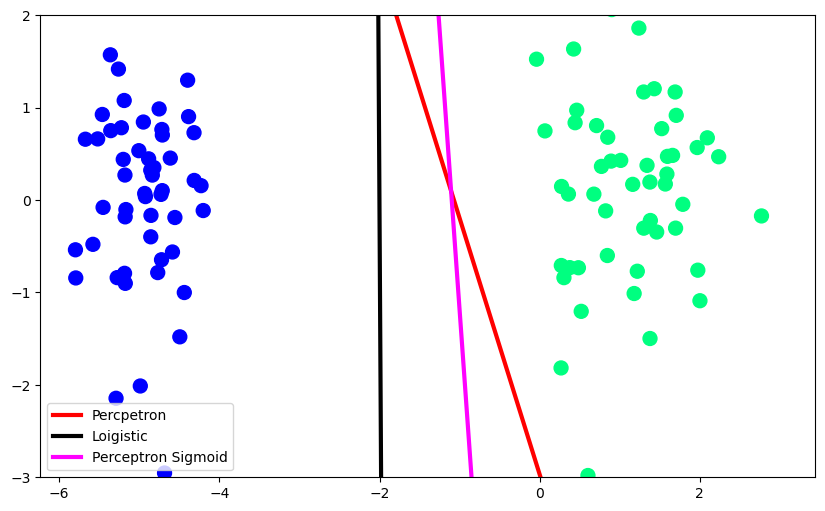

In [23]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3, label='Percpetron')
plt.plot(x_input1,y_input1,color='black',linewidth=3, label='Loigistic')
plt.plot(x_input2,y_input2,color='magenta',linewidth=3, label = 'Perceptron Sigmoid')
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)
plt.legend()
plt.show()